<a href="https://colab.research.google.com/github/nadeemk0/Countdown-timer/blob/main/KNN_Used_Bike_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing library***

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Uploading our dataset and converting into a datafrme using pandas**

In [72]:
df=pd.read_csv('Used_Bikes data.csv')
df.head()


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


describing the dataset

In [74]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


**Finding the missing value**

In [75]:
df.isnull()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
32643,False,False,False,False,False,False,False,False
32644,False,False,False,False,False,False,False,False
32645,False,False,False,False,False,False,False,False
32646,False,False,False,False,False,False,False,False


In [76]:
df.isnull().sum()

,0
bike_name,0
price,0
city,0
kms_driven,0
owner,0
age,0
power,0
brand,0


In [77]:
df.bike_name.value_counts()

,count
bike_name,
Bajaj Pulsar 150cc,2776
Bajaj Avenger Street 220,2531
Bajaj Avenger 220cc,2060
Royal Enfield Classic 350cc,1673
Hero Passion Pro 100cc,1432
...,...
Indian Chief Classic 1800cc,1
TVS Apache RTR 160cc White Race Edition Rear Disc,1
Triumph Bonneville T100 900cc,1


In [78]:
df.city.value_counts()

,count
city,
Delhi,7318
Bangalore,2723
Mumbai,2591
Hyderabad,2160
Pune,1724
...,...
Surendranagar,1
Khandela,1
Mohammadabad,1


In [79]:
df.brand.value_counts()

,count
brand,
Bajaj,11213
Hero,6368
Royal Enfield,4178
Yamaha,3916
Honda,2108
Suzuki,1464
TVS,1247
KTM,1077
Harley-Davidson,737


**Dropping the columns**

As we can see that the number of categories in the columns having bike_name,brand,city is very high hence it will be difficult to assign values to them therefore making it difficult in prediction in price so we need to drop these columns

In [80]:
df.drop(['bike_name','city','brand'],axis=1,inplace=True)

**Assigning dummy variables to owner column**

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['owner']=le.fit_transform(df['owner'])

In [82]:
df.head()

,price,kms_driven,owner,age,power
0,35000,17654,0,3,110
1,119900,11000,0,4,350
2,600000,110,0,8,675
3,65000,16329,0,4,180
4,80000,10000,0,3,150


**visualising relationship between various components**

In [83]:
df.corr()

,price,kms_driven,owner,age,power
price,1.000000,-0.313955,-0.042885,-0.399133,0.862376
kms_driven,-0.313955,1.000000,-0.016986,0.484684,-0.264016
owner,-0.042885,-0.016986,1.000000,0.297564,0.043130
age,-0.399133,0.484684,0.297564,1.000000,-0.337035
power,0.862376,-0.264016,0.043130,-0.337035,1.000000


<Axes: >

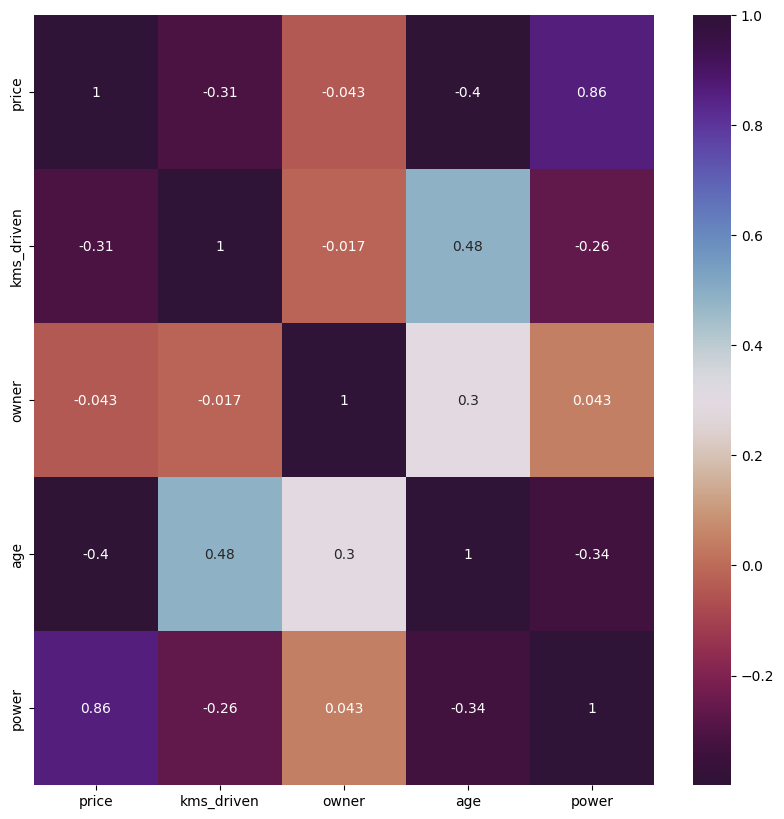

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,cmap='twilight_shifted_r')

Text(0, 0.5, 'owner')

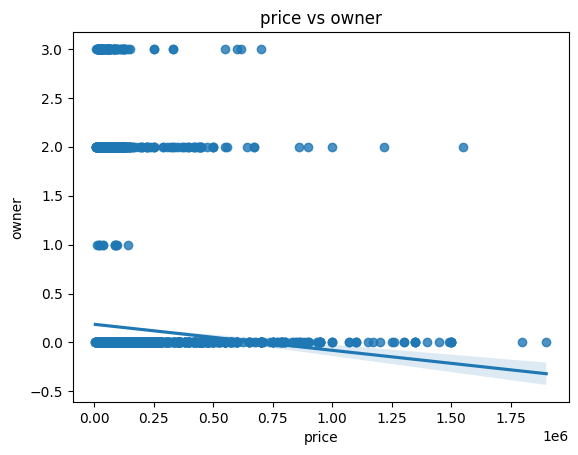

In [85]:
sns.regplot(x='price', y='owner', data=df)
plt.title('price vs owner')
plt.xlabel('price')
plt.ylabel('owner')

Text(0, 0.5, 'Distace Driven')

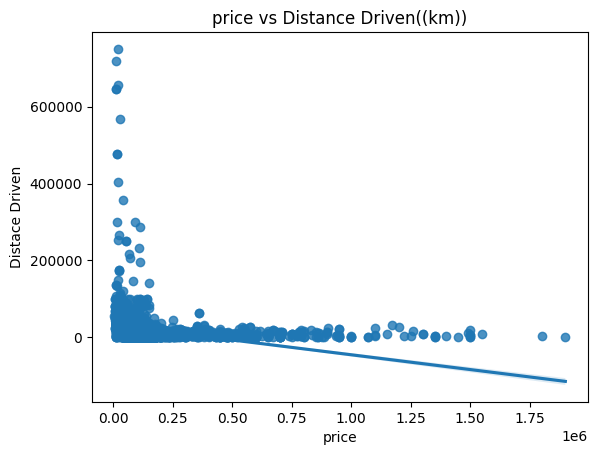

In [86]:
sns.regplot(x='price', y='kms_driven', data=df)
plt.title('price vs Distance Driven((km))')
plt.xlabel('price')
plt.ylabel('Distace Driven')

Text(0, 0.5, 'age')

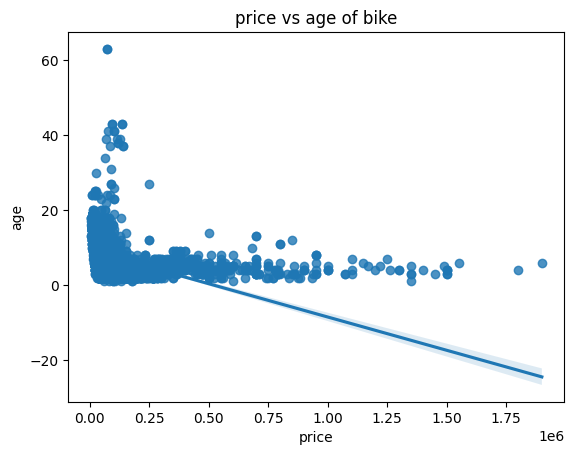

In [87]:
sns.regplot(x='price', y='age', data=df)
plt.title('price vs age of bike')
plt.xlabel('price')
plt.ylabel('age')

Text(0, 0.5, 'power')

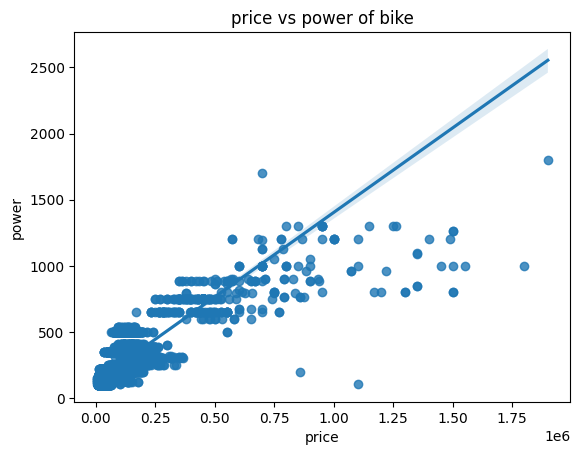

In [88]:
sns.regplot(x='price', y='power', data=df)
plt.title('price vs power of bike')
plt.xlabel('price')
plt.ylabel('power')

**splitting our data into dependent and independent factors**

As we know that the price is dependent factor and rest are independent so we will split our data accordingly

In [89]:
X=df.iloc[:,1:5]

In [90]:
print(X)

       kms_driven  owner  age  power
0           17654      0    3    110
1           11000      0    4    350
2             110      0    8    675
3           16329      0    4    180
4           10000      0    3    150
...           ...    ...  ...    ...
32643       22000      0    4    100
32644        6639      0    9    180
32645       20373      0    6    220
32646       84186      0   16    125
32647       60857      0   13    150

[32648 rows x 4 columns]


In [91]:
y=df.iloc[:,0]

In [92]:
y

,price
0,35000
1,119900
2,600000
3,65000
4,80000
...,...
32643,39000
32644,30000
32645,60000
32646,15600


**Importing train test split**

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [94]:
X_train

,kms_driven,owner,age,power
26924,22000,0,4,100
28406,22000,0,4,100
22816,140,0,3,160
10138,3869,0,16,100
1192,21483,0,3,200
...,...,...,...,...
29802,20000,0,4,350
5390,9800,0,6,150
860,17000,0,5,160
15795,20000,0,6,100


In [95]:
X_test

,kms_driven,owner,age,power
28994,22824,0,8,100
31433,42837,0,8,150
17250,64955,0,15,150
13738,36000,0,15,150
24577,16336,0,7,350
...,...,...,...,...
10877,34968,0,14,150
32314,48587,0,8,150
17122,20373,0,6,220
28334,7127,0,5,220


**Feature Scaling**

In our dataset some features take larger value than the values in other features and it may overpower and hence all the feature not able to contribute equally.

Applying feature scaling can make the features to contribute equally for better accuracy.

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Importing KNN**
using K Nearest Neighbour regression Algorithm for better accuracy.

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
KNeighborsRegressor()
KNN_predict = knn.predict(X_test)
KNN_predict

array([ 18000.,  43000.,  10000., ...,  60000.,  80000., 105000.])

**Checking the Accuracy of the algorithm**

In [98]:
from sklearn.metrics import r2_score
score=r2_score(KNN_predict,y_test)
score

0.9156915210103977

The model trained by KNN has an accuracy of 91.56%.it's a good accuracy but we can increase it's accuracy further by using

**K-Fold Cross-Validation**

In [99]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.58 %
Standard Deviation: 2.91 %


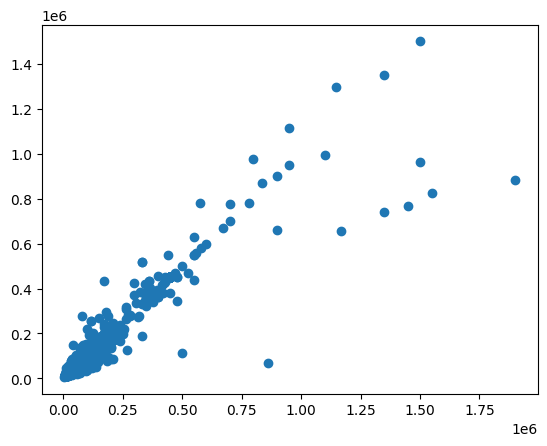

In [100]:
plt.scatter(y_test, KNN_predict)

**having single prediction for above model**

In [118]:
print(knn.predict(sc.transform([[9000,3,6,300]])))

[82126.77892377]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
